# Basic task sumbission

range resolution = 1 
azimuth looks = 4

https://docs.canopy.umbra.space/reference/create_task

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Get first task parameters
import pystac_client
import os
import geopandas as gpd
import pandas as pd
import requests
#import xyzservices
import numpy as np

import umbra_utils

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
API = "https://api.canopy.umbra.space"
SANDBOX_API = "https://api.canopy.prod.umbra-sandbox.space"

In [4]:
aoi = gpd.read_file("../paradise.geojson")
aoi.explore(zoom_start=12, marker_type='marker')#, marker_kwds=dict(icon=folium.map.Icon(color='black')))

## Check tasking potential acquisitions ("feasability")

https://docs.canopy.umbra.space/docs/feasibility

In [5]:
# Search one week into the future
# Umbra suggests at least 90min into future to allow for scheduling
now = gpd.pd.Timestamp.now().floor('s') + gpd.pd.Timedelta(minutes=90)
next_week = now + gpd.pd.Timedelta(days=7)
# Umbra API requires Z at end (UTC)
print(now.isoformat()+'Z', next_week.isoformat()+'Z')

2024-10-25T18:37:21Z 2024-11-01T18:37:21Z


In [6]:
acquisition = umbra_utils.acquisition_1_4
acquisition

{'rangeResolutionMinMeters': 1,
 'multilookFactor': 4,
 'grazingAngleMinDegrees': 32,
 'grazingAngleMaxDegrees': 80}

In [7]:
url = f"{API}/tasking/feasibilities"
tasking_params = {
    "imagingMode": "SPOTLIGHT",
    "spotlightConstraints": {
        "geometry": aoi.geometry[0].__geo_interface__,
        "polarization": "VV",
        "targetAzimuthAngleStartDegrees": 0,
        "targetAzimuthAngleEndDegrees": 360,
        "sceneSize": "5x5_KM"
    },
    "windowStartAt": now.isoformat()+'Z',
    "windowEndAt": next_week.isoformat()+'Z',
}

# Add acquitision constraints
tasking_params['spotlightConstraints'].update(acquisition)
print(tasking_params) 

headers = {
    "accept": "application/json",
    "content-type": "application/json",
    "authorization": f"Bearer {os.environ.get('UMBRA_API_TOKEN')}"
}

response = requests.post(url, json=tasking_params, headers=headers)

{'imagingMode': 'SPOTLIGHT', 'spotlightConstraints': {'geometry': {'type': 'Point', 'coordinates': (-121.74456, 46.79679, 1589.0)}, 'polarization': 'VV', 'targetAzimuthAngleStartDegrees': 0, 'targetAzimuthAngleEndDegrees': 360, 'sceneSize': '5x5_KM', 'rangeResolutionMinMeters': 1, 'multilookFactor': 4, 'grazingAngleMinDegrees': 32, 'grazingAngleMaxDegrees': 80}, 'windowStartAt': '2024-10-25T18:37:21Z', 'windowEndAt': '2024-11-01T18:37:21Z'}


In [10]:
# Retrieve feasibilities (wait 10sec before running)

url = f"{API}/tasking/feasibilities/{response.json()['id']}"

response = requests.get(url, headers=headers)

df = pd.DataFrame(response.json()['opportunities'])
df

,windowStartAt,windowEndAt,durationSec,grazingAngleStartDegrees,grazingAngleEndDegrees,targetAzimuthAngleStartDegrees,targetAzimuthAngleEndDegrees,squintAngleStartDegrees,squintAngleEndDegrees,squintAngleEngineeringDegreesStart,squintAngleEngineeringDegreesEnd,slantRangeStartKm,slantRangeEndKm,groundRangeStartKm,groundRangeEndKm,satelliteId
0,2024-10-25T18:32:41+00:00,2024-10-25T18:44:13+00:00,92.0,42.762173,35.435610,73.219451,144.335472,25.742273,-44.631828,64.257727,134.631828,719.698697,822.817308,489.297621,622.957491,Umbra-08
1,2024-10-26T04:59:48+00:00,2024-10-26T05:11:12+00:00,84.0,47.759192,47.885786,214.319664,304.387287,44.864471,-44.575936,45.135529,134.575936,679.704246,677.990262,424.139594,419.828531,Umbra-05
2,2024-10-26T05:36:45+00:00,2024-10-26T05:49:18+00:00,153.0,32.874748,32.820069,115.326996,26.281951,135.231773,-135.193001,-45.231773,-134.806999,991.792044,991.297511,765.170207,762.721962,Umbra-10
3,2024-10-26T06:02:30+00:00,2024-10-26T06:12:38+00:00,8.0,79.854222,76.688211,54.823418,30.484663,-159.533084,-135.149121,-110.466916,-134.850879,597.444182,603.670227,95.303670,125.664901,Umbra-09
4,2024-10-26T18:02:19+00:00,2024-10-26T18:13:19+00:00,60.0,55.950105,51.073506,316.581051,242.512529,149.332363,-136.319386,-59.332363,-133.680614,619.967251,656.420486,319.726029,382.120731,Umbra-05
5,2024-10-26T18:51:01+00:00,2024-10-26T19:02:30+00:00,89.0,48.404090,41.102103,73.511455,145.179481,26.178249,-44.786061,63.821751,134.786061,761.671647,850.411300,462.815155,588.886848,Umbra-10
6,2024-10-27T05:42:02+00:00,2024-10-27T05:54:09+00:00,127.0,38.577412,38.758950,116.486426,27.401017,135.010820,-135.408741,-45.010820,-134.591259,887.683123,883.550099,637.178117,630.076320,Umbra-10
7,2024-10-27T06:28:11+00:00,2024-10-27T06:38:56+00:00,45.0,32.035117,32.060451,249.382082,276.213195,13.379157,-13.033222,76.620843,103.033222,879.927552,878.876657,692.836923,691.103428,Umbra-08
8,2024-10-27T18:56:22+00:00,2024-10-27T19:07:20+00:00,58.0,57.919799,49.400637,85.000629,145.560641,15.732999,-44.395343,74.267001,134.395343,682.586320,752.002914,331.904764,449.827585,Umbra-10
9,2024-10-27T19:21:18+00:00,2024-10-27T19:32:01+00:00,43.0,67.894543,68.253530,330.160080,241.567894,135.078122,-136.101843,-45.078122,-133.898157,630.748095,629.626756,215.719999,214.443667,Umbra-09


In [11]:
# Add midpoints to acquisition ranges
df['targetAzimuthAngle'] = (df['targetAzimuthAngleEndDegrees'] - df['targetAzimuthAngleStartDegrees'])/2 + df['targetAzimuthAngleStartDegrees']
df['grazingAngle'] = (df['grazingAngleEndDegrees'] - df['grazingAngleStartDegrees'])/2 + df['grazingAngleStartDegrees']
df['incidenceAngle'] = 90 - df.grazingAngle
df['squintAngleEngineering'] = (df['squintAngleEngineeringDegreesEnd'] - df['squintAngleEngineeringDegreesStart'])/2 + df['squintAngleEngineeringDegreesStart']

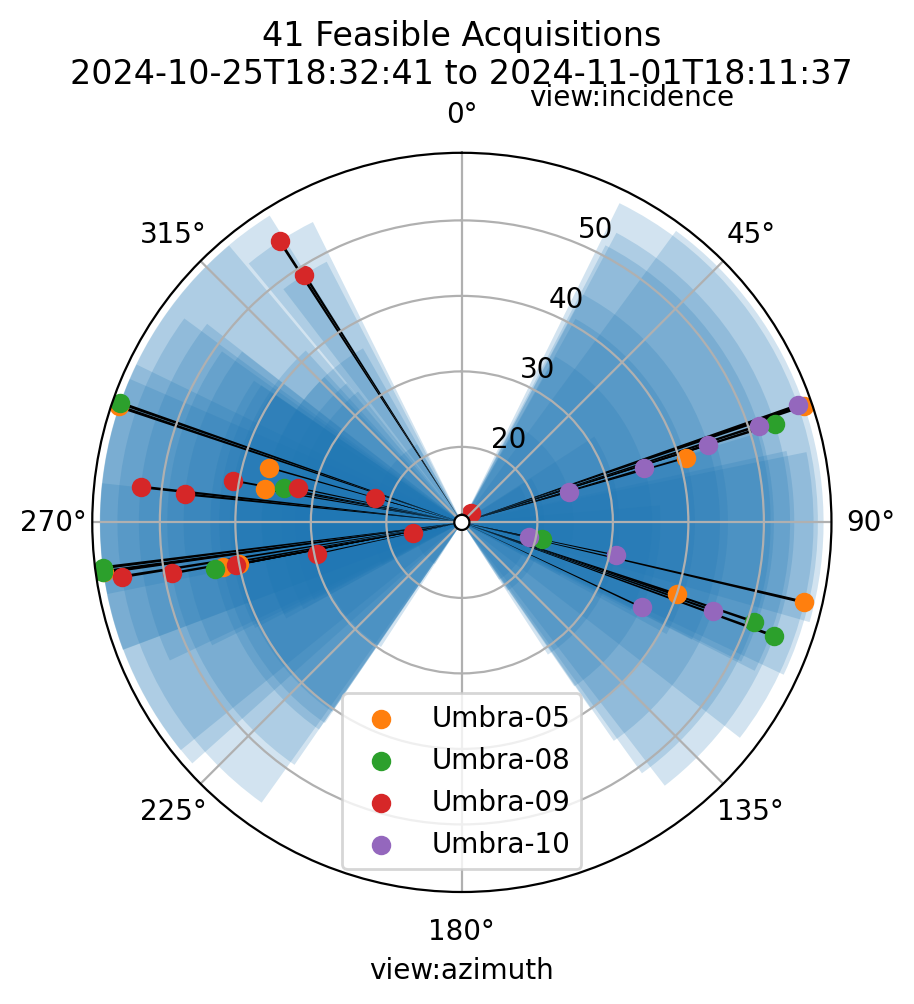

In [12]:
ax = umbra_utils.plot_feasibilities_polar(df, satnames=True, incidence_range='auto')

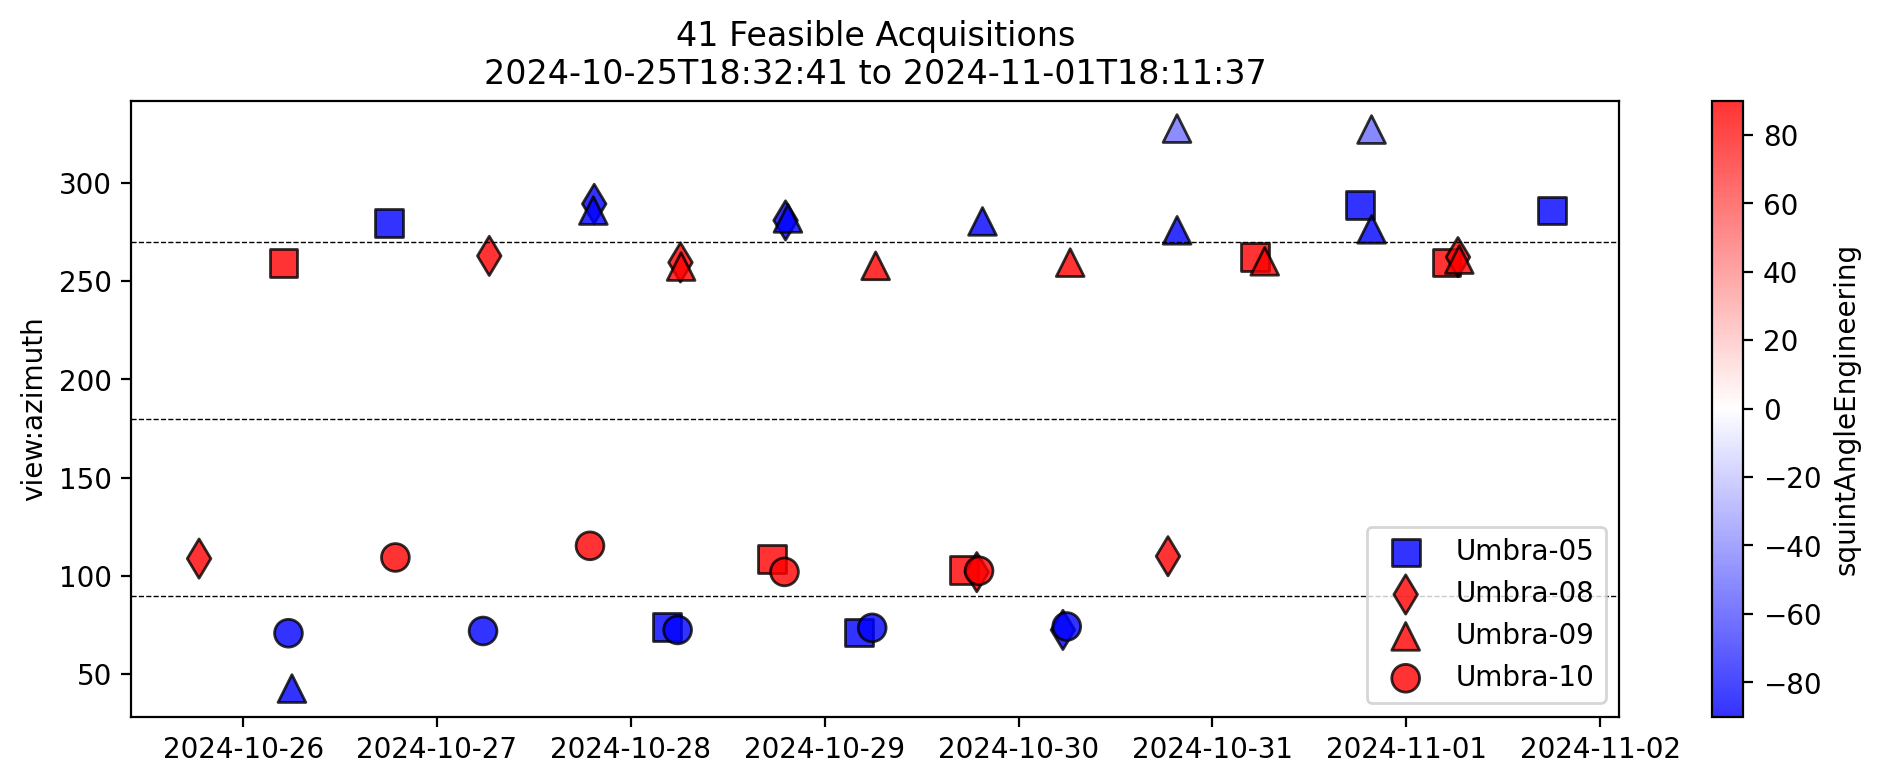

In [15]:
# NOTE: could add error bars showing azimuth angle range of acquisition
ax = umbra_utils.plot_feasibilities_squint(df)

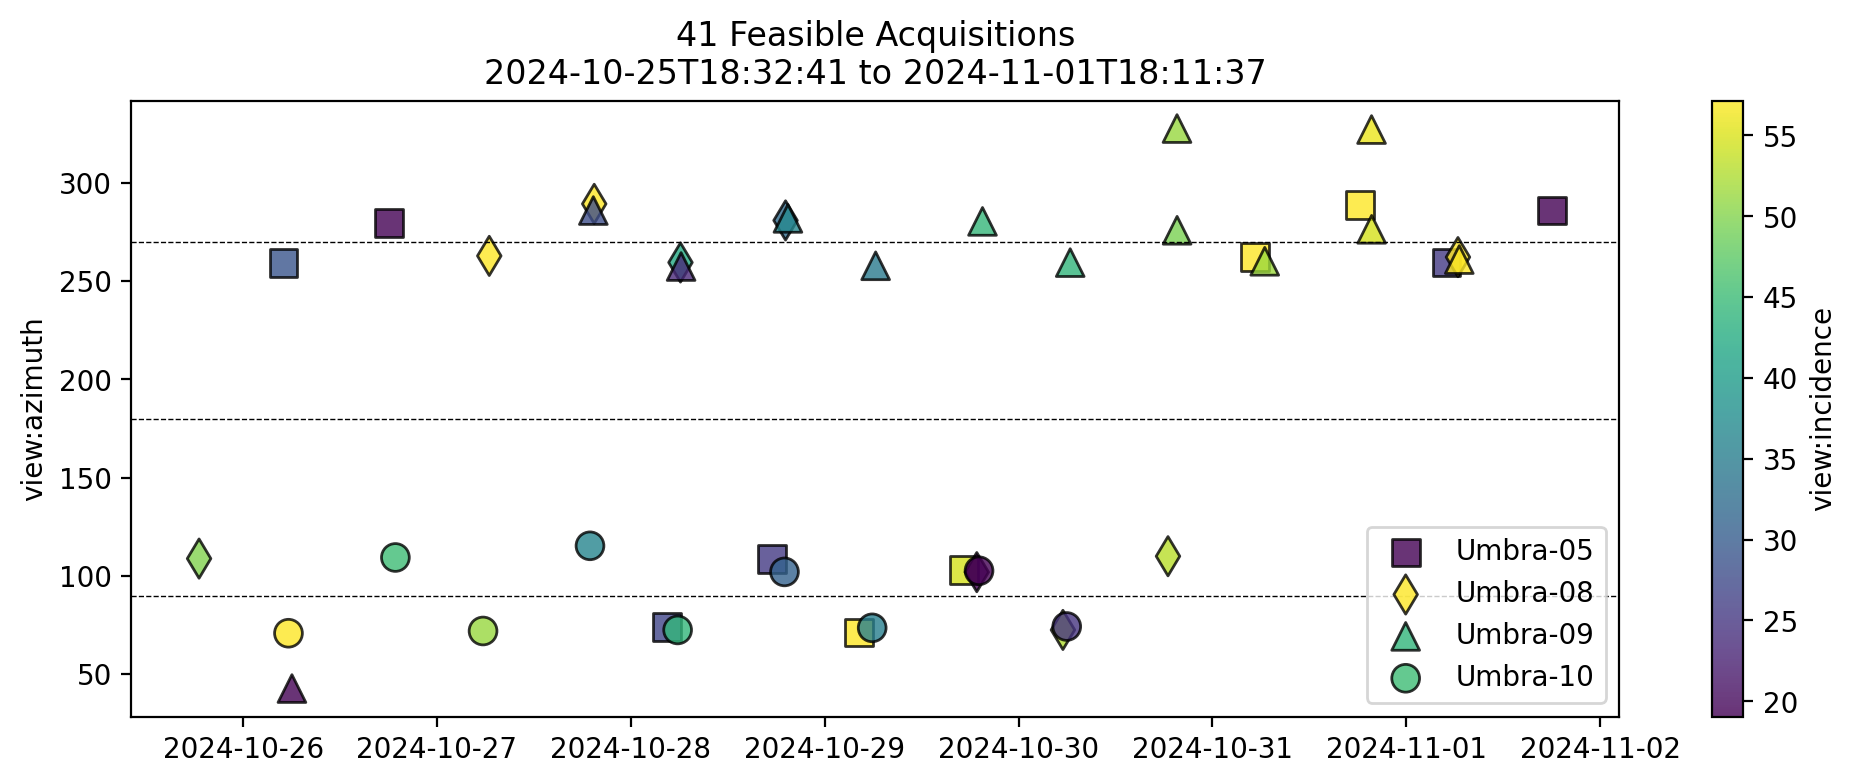

In [16]:
ax = umbra_utils.plot_feasibilities_incidence(df)

In [22]:
# Pick next acquisition with a target range
target_incidence = 30 
ipad = 5

target_azimuth = 270
apad = 30

# Not sure how much these estimates will vary in 3-4 days, so just constrain by satellite and start_end window!
within_incidence = (df.incidenceAngle >= target_incidence-ipad) & (df.incidenceAngle <= target_incidence+ipad)
within_aziumth = (df.targetAzimuthAngle >= target_azimuth-apad) & (df.targetAzimuthAngle <= target_azimuth+apad)

picks = df[within_aziumth & within_incidence]
picks

,windowStartAt,windowEndAt,durationSec,grazingAngleStartDegrees,grazingAngleEndDegrees,targetAzimuthAngleStartDegrees,targetAzimuthAngleEndDegrees,squintAngleStartDegrees,squintAngleEndDegrees,squintAngleEngineeringDegreesStart,squintAngleEngineeringDegreesEnd,slantRangeStartKm,slantRangeEndKm,groundRangeStartKm,groundRangeEndKm,satelliteId,targetAzimuthAngle,grazingAngle,incidenceAngle,squintAngleEngineering
17,2024-10-28T19:08:54+00:00,2024-10-28T19:19:50+00:00,56.0,57.998203,54.162003,320.447395,241.231874,145.121576,-135.391088,-55.121576,-134.608912,589.860367,614.778119,288.367906,334.277168,Umbra-08,280.839634,56.080103,33.919897,-94.865244
18,2024-10-28T19:26:38+00:00,2024-10-28T19:37:39+00:00,61.0,59.597149,56.152397,321.576523,242.175315,144.627740,-135.678498,-54.627740,-134.321502,672.251712,695.648102,310.112254,355.724568,Umbra-09,281.875919,57.874773,32.125227,-94.474621
21,2024-10-29T06:18:13+00:00,2024-10-29T06:29:14+00:00,61.0,60.149922,60.504973,212.987724,302.527290,44.983169,-44.126725,45.016831,134.126725,669.942094,667.312228,306.825018,299.882088,Umbra-09,257.757507,60.327447,29.672553,89.571778


In [25]:
# Tighten tasking_params of allowed min/max ranges
mypick = picks.iloc[0]
azimuth_tolerance = 20

# Plus or minus 1 hour around our pick
start = pd.to_datetime(mypick['windowStartAt']).tz_localize(None)
end = pd.to_datetime(mypick['windowEndAt']).tz_localize(None)
window_start = start - gpd.pd.Timedelta(hours=1)
window_end = end + gpd.pd.Timedelta(hours=1)

myconstraints = {
  'polarization': 'VV', 
  'targetAzimuthAngleStartDegrees': int(mypick.targetAzimuthAngleStartDegrees - azimuth_tolerance),
  'targetAzimuthAngleEndDegrees': int(mypick.targetAzimuthAngleEndDegrees + azimuth_tolerance),
}

tasking_params['spotlightConstraints'].update(myconstraints)

tasking_params.update({
    'satelliteIds': [mypick.satelliteId],
    'windowStartAt': window_start.isoformat()+'Z',
    'windowEndAt': window_end.isoformat()+'Z',
    "tags": ["paradise","uw"],
    "taskName": "paradise3",
    "userOrderId": "UW"

})
tasking_params

{'imagingMode': 'SPOTLIGHT',
 'spotlightConstraints': {'geometry': {'type': 'Point',
   'coordinates': (-121.74456, 46.79679, 1589.0)},
  'polarization': 'VV',
  'targetAzimuthAngleStartDegrees': 300,
  'targetAzimuthAngleEndDegrees': 261,
  'sceneSize': '5x5_KM',
  'rangeResolutionMinMeters': 1,
  'multilookFactor': 4,
  'grazingAngleMinDegrees': 32,
  'grazingAngleMaxDegrees': 80},
 'windowStartAt': '2024-10-28T18:08:54Z',
 'windowEndAt': '2024-10-28T20:19:50Z',
 'satelliteIds': ['Umbra-08'],
 'tags': ['paradise', 'uw'],
 'taskName': 'paradise3',
 'userOrderId': 'UW'}

## Actually submit task!

In [26]:
# NOTE: need different API key for sanbox mode?
url = f"{API}/tasking/tasks"
response = requests.post(url, json=tasking_params, headers=headers)
print(response.text)

{"id":"644cc5e9-8702-44d8-a154-235d3c8233f2","type":"Feature","geometry":{"type":"Point","coordinates":[-121.74456,46.79679,1589.0]},"properties":{"imagingMode":"SPOTLIGHT","spotlightConstraints":{"geometry":{"type":"Point","coordinates":[-121.74456,46.79679,1589.0]},"polarization":"VV","rangeResolutionMinMeters":1.0,"multilookFactor":4,"grazingAngleMinDegrees":32,"grazingAngleMaxDegrees":80,"targetAzimuthAngleStartDegrees":300,"targetAzimuthAngleEndDegrees":261,"sceneSize":"5x5_KM"},"windowStartAt":"2024-10-28T18:08:54+00:00","windowEndAt":"2024-10-28T20:19:50+00:00","deliveryConfigId":null,"productTypes":["GEC","SIDD","SICD","CPHD"],"tags":["paradise","uw"],"taskName":"paradise3","userOrderId":"UW","satelliteIds":["Umbra-08"],"id":"644cc5e9-8702-44d8-a154-235d3c8233f2","createdAt":"2024-10-25T15:31:24.800237+00:00","updatedAt":"2024-10-25T15:31:24.800242+00:00","organizationId":"org_Eukdrsr1pe3dXZrR","status":"SUBMITTED","statusHistory":[{"status":"RECEIVED","timestamp":"2024-10-25T1